Considere uma cadeia circular (primeira massa conectada a última) composta por N átomos conectados por molas idênticas de constante elástica k . O sistema pode ser de dois tipos:

• Cadeia Ternária: As massas alternam entre m e m2=3m e m3=5m  ao longo da cadeia.

• Cadeia Homogênea: Todas as massas são iguais a m .
Ambos os sistemas devem ser analisados sob condições de contorno com pontas livres (as extremidades da cadeia não estão presas).

In [16]:
import numpy as np
import matplotlib.pyplot as plt

1. Cálculo das Frequências de Vibração

Para cada valor de N , calcule as frequências naturais de vibração para:

• Cadeia circular ternária(alternância  --m--m2--m3--m--m2--m3-- )

• Cadeia homogênea (todas as massas iguais) com pontas livres

Parâmetros
• Massas: m= 1kg , 
• Constante elástica:  k = 1N/m
• Tamanhos da cadeia: N = 100, 1000 e 10.000

In [17]:
### criar a matrix densa que generaliza matrix circular e matrix com pontas livres
def create_matrix(N, m, k):
    """
    Gera a matriz dinâmica D com base nas massas (m) e nas constantes de mola (k).
    """
    #Matrix_zeros = []
    matrix_zeros = np.zeros((N,N), dtype=float)
    
    for i in range(N):
        for j in range(N):
            if i == j:
                if i == 0: ## circular
                    matrix_zeros[i,j] = (k[0] + k[N - 1])/ m[i]
                elif i == N-1: ## circular
                    matrix_zeros[i,j] = (k[i - 1] + k[N - 1]) / m[i]
                else:
                    matrix_zeros[i,j] = (k[i - 1] + k[i]) / m[i] ## fecha a matriz circular
            elif abs(i - j) == 1:## vizinhos imediatos i e j, sendo j=i+1 → vizinho à direita e j=i−1 → vizinho à esquerda
                k_index = min (i,j) ## 2 para 1 ### matrix K
                matrix_zeros[i,j] = -k[k_index] / m[i]
            elif (i == N-1 and j == 0) or (i == 0 and j == N-1): ## sem vizinhos, agora em analisar cadeira linear
                matrix_zeros[i, j] = -k[N - 1] / m[i]
    
    matrix_m = matrix_zeros

    return matrix_m

In [25]:
def calculate_autovalores_autovetores (matrix_m):
        """
        Calcula autovalores e autovetores
        """
        autovalores, autovetores = np.linalg.eig(matrix_m)
        sorted_indices = np.argsort(autovalores)

        autovalores = autovalores[sorted_indices]
        autovetores = autovetores[:, sorted_indices]
        return autovalores, autovetores

Os autovalores λ da matriz dinâmica representam ω² (frequência angular ao quadrado).

Para obter as frequências naturais (ω), fazemos:

𝜔𝑖 = (𝜆)^1/2
 
O histograma das ω nos mostra quantos modos vibram em cada faixa de frequência.

In [19]:
def calcular_frequencias(autovalores):
    """
    Converte autovalores λ em frequências ω (assumindo λ = ω²)
    """
    autovalores_reais = np.real(autovalores)
    autovalores_reais[autovalores_reais < 0] = 0  # evita sqrt de negativos
    return np.sqrt(autovalores_reais)

In [20]:
def gerar_massa_ternaria(N):
    """
    Gera vetor de massas com padrão m, 3m, 5m, m, 3m, 5m...
    """
    padrao = [1.0, 3.0, 5.0]
    return np.array([padrao[i % 3] for i in range(N)])

2. Densidade de Estados
• Construa histogramas (densidade de estados) para os valores das frequências em cada caso.
• Compare os histogramas entre a cadeia binária e a homogênea, para cada tamanho de N .

In [21]:
def plotar_comparacao_histogramas(calcular_frequencias, N, bins=10):
    """
    Plota histogramas lado a lado para a cadeia homogênea e binária.
    """
    plt.figure(figsize=(8, 4))
    plt.hist(calcular_frequencias, bins=bins, density=True, alpha=0.5, label='Homogênea', edgecolor='black')
    plt.title(f'Densidade de Estados Vibracionais (N={N})')
    plt.xlabel('Frequência ω')
    plt.ylabel('Densidade')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


3. Deslocamentos Relativos (Modos Normais)

• Para cada cadeia, obtenha os vetores de deslocamento (modos normais) correspondentes:

• Às cinco menores frequências (modos de baixa energia)

• Às cinco maiores frequências (modos de alta energia)

• Apresente gráficos dos deslocamentos relativos dos átomos para esses modos.

In [22]:
def plotar_modos_normais(calcular_frequencias, vetores, N, titulo_prefixo=''):
    """
    Plota os modos normais correspondentes às 5 menores e 5 maiores frequências.
    """
    # Frequência ordenada: já deve vir ordenada do cálculo
    indices_baixos = np.arange(5)
    indices_altos = np.arange(-5, 0)

    x = np.arange(N)  # posição dos átomos na cadeia

    plt.figure(figsize=(12, 6))

    for idx, i in enumerate(indices_baixos):
        plt.subplot(2, 5, idx + 1)
        plt.plot(x, vetores[:, i], marker='o')
        plt.title(f'ω={calcular_frequencias[i]:.2f}')
        plt.xlabel('Átomo')
        plt.ylabel('Deslocamento')
        plt.grid(True)

    for idx, i in enumerate(indices_altos):
        plt.subplot(2, 5, 5 + idx + 1)
        plt.plot(x, vetores[:, i], marker='o', color='orange')
        plt.title(f'ω={calcular_frequencias[i]:.2f}')
        plt.xlabel('Átomo')
        plt.ylabel('Deslocamento')
        plt.grid(True)

    plt.suptitle(f'{titulo_prefixo} - Modos Normais (5 menores e 5 maiores)')
    plt.tight_layout()
    plt.show()


4. Análise e Comparação

Analise como a alternância de massas (ternária) e a homogeneidade afetam:

• A distribuição das frequências (densidade de estados)

• Os padrões de deslocamento dos modos normais

• Discuta a presença de possíveis lacunas de frequência (band gaps) e a localização dos modos.


===== COMPARAÇÃO HOMOGÊNEA x TERNÁRIA (N=100) =====



C:\Users\Raíssa Vieira\AppData\Local\Temp\ipykernel_1944\2266659325.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


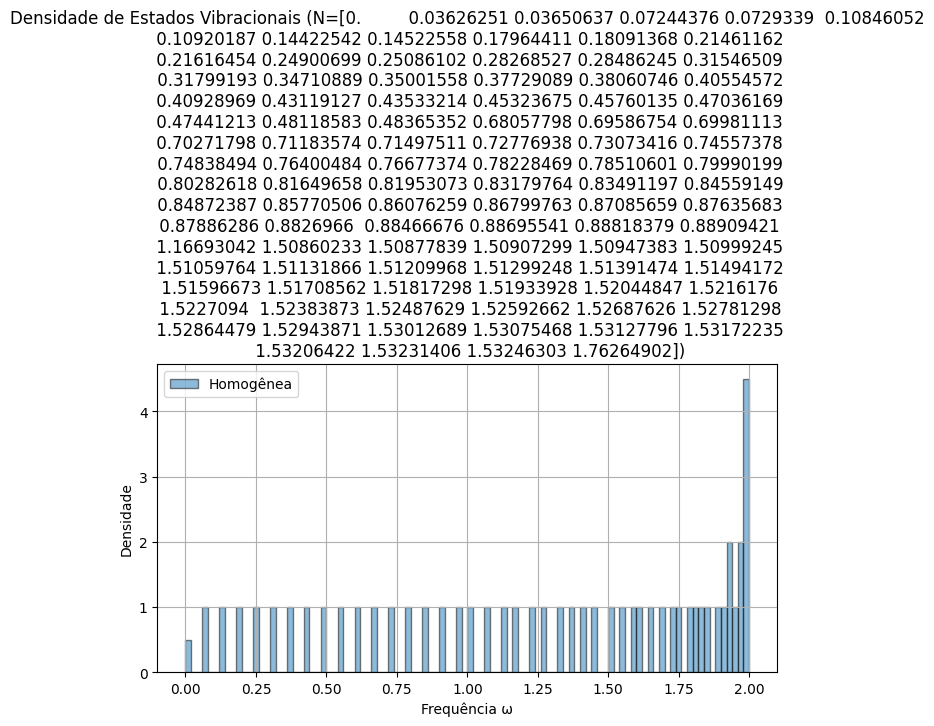


Modos Normais - Cadeia Homogênea (N=100)


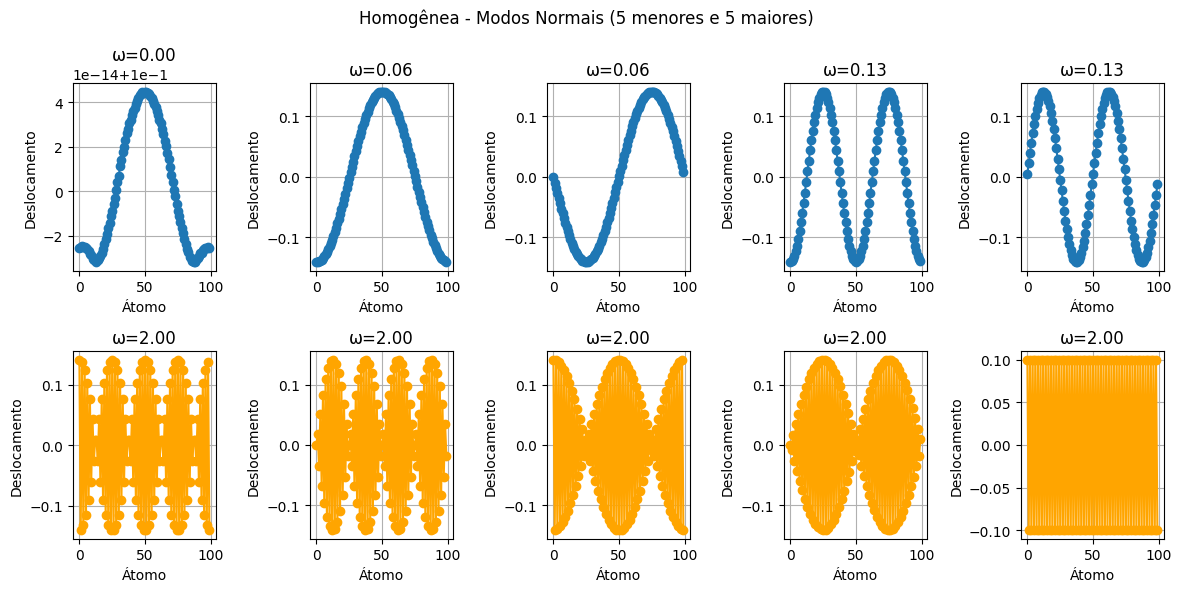


Modos Normais - Cadeia Ternária (N=100)


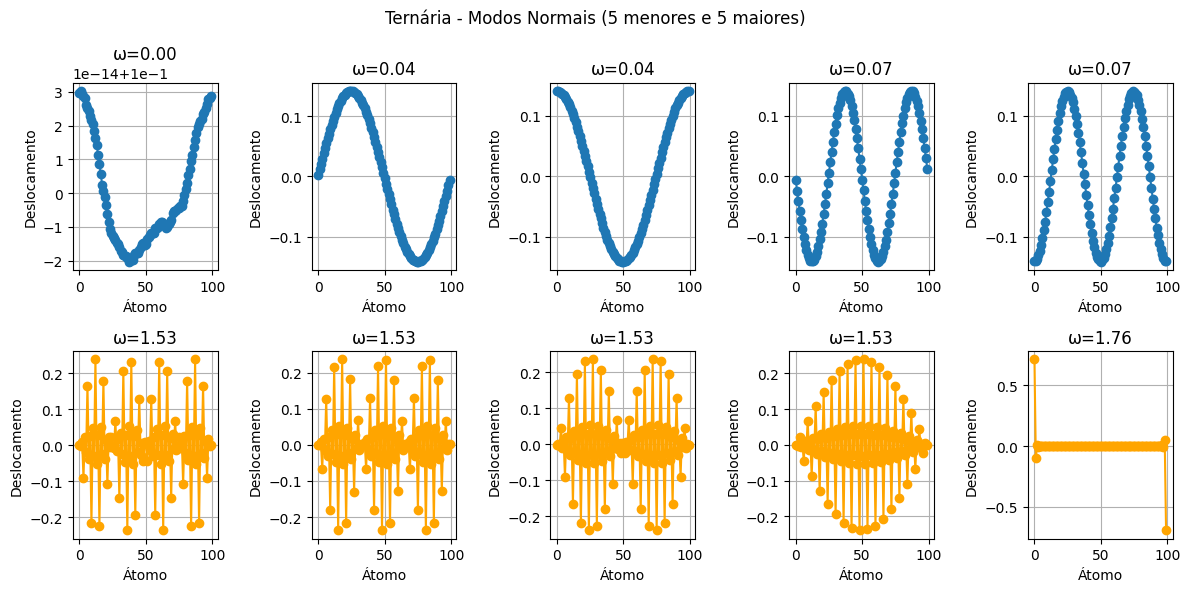


===== COMPARAÇÃO HOMOGÊNEA x TERNÁRIA (N=1000) =====



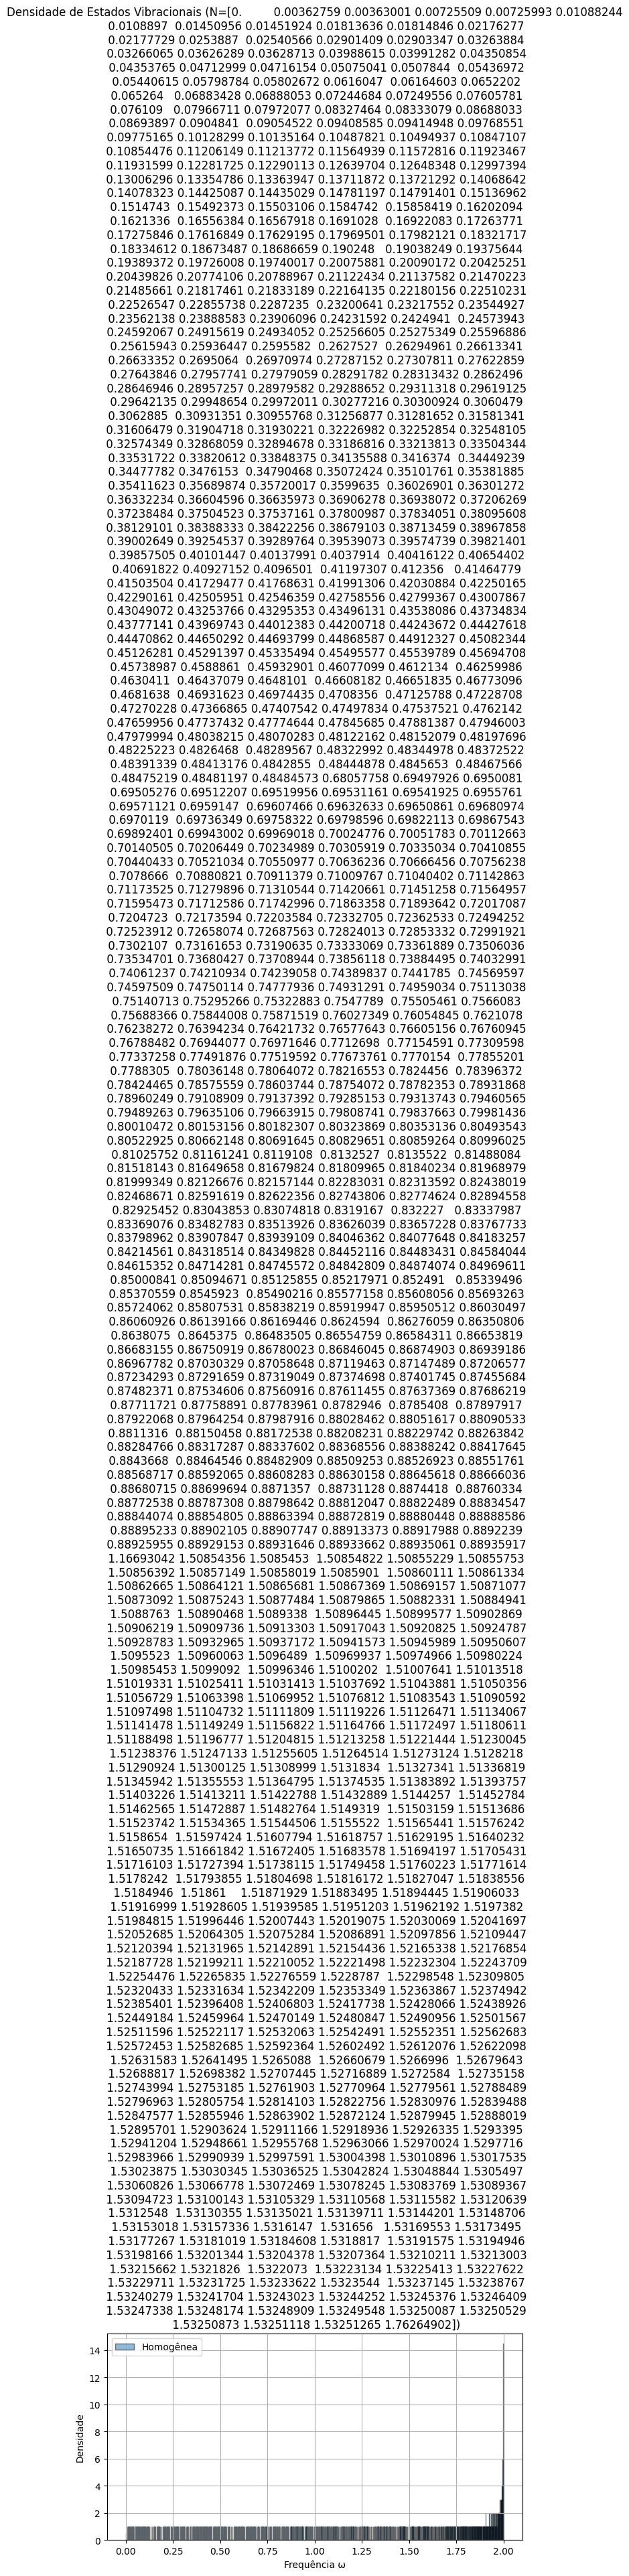


Modos Normais - Cadeia Homogênea (N=1000)


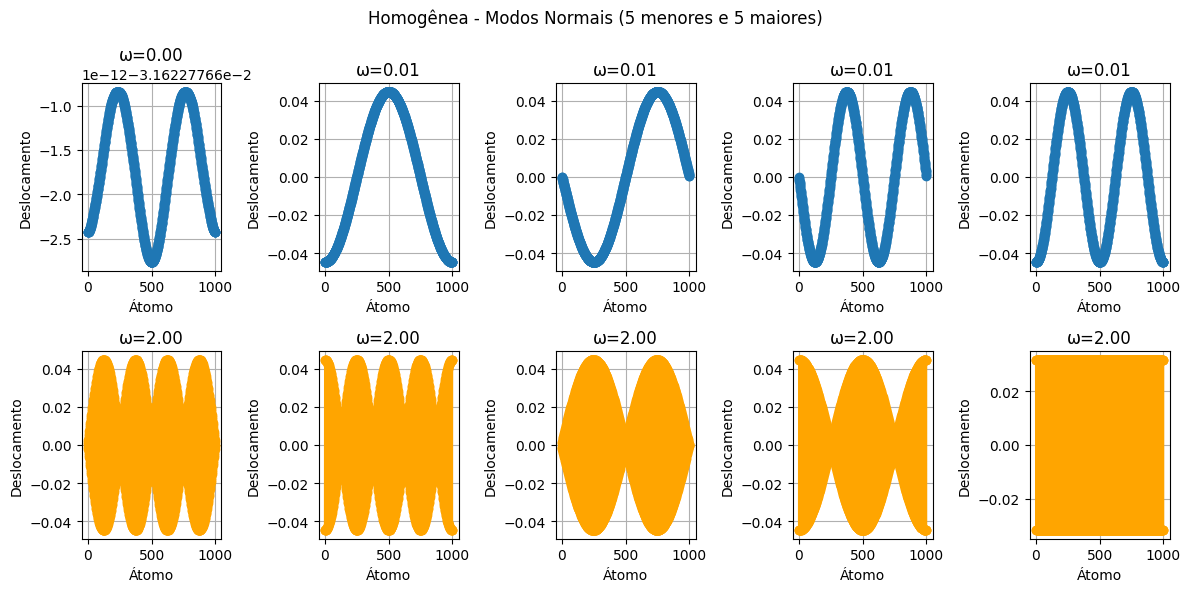


Modos Normais - Cadeia Ternária (N=1000)


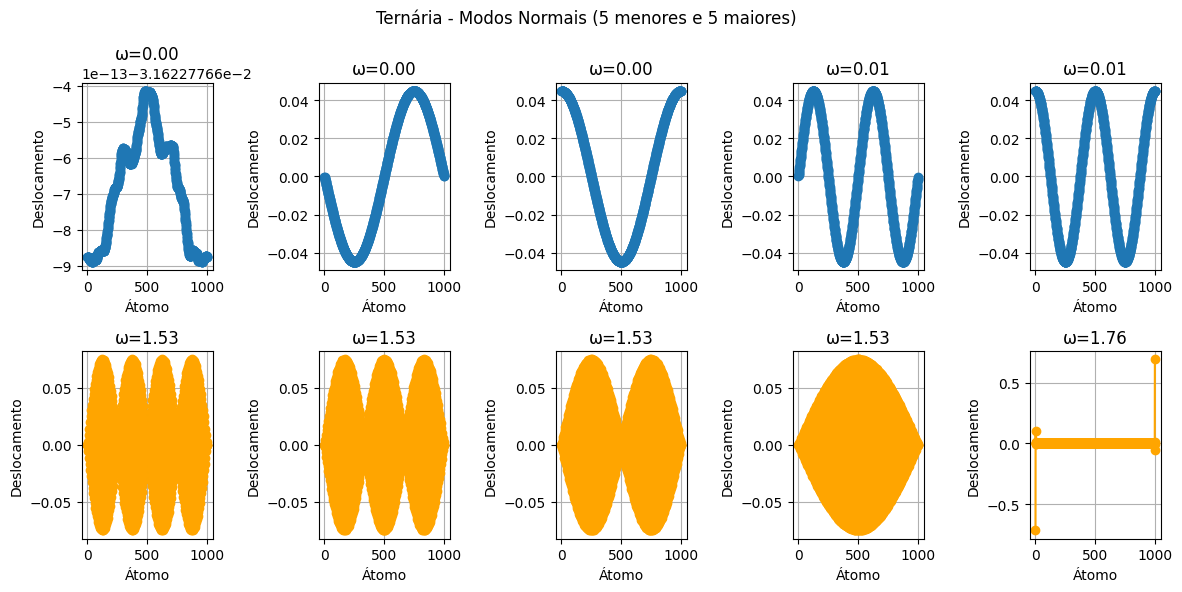


===== COMPARAÇÃO HOMOGÊNEA x TERNÁRIA (N=10000) =====



In [ ]:
tamanhos = [100, 1000, 10000]
k_padrao = 1

for N in tamanhos:
    print(f'\n===== COMPARAÇÃO HOMOGÊNEA x TERNÁRIA (N={N}) =====\n')

    k = np.ones(N) * k_padrao

    # --- Cadeia homogênea ---
    m_hom = np.ones(N)
    D_hom = create_matrix(N, m_hom, k)
    autovalores_hom, autovetores_hom = calculate_autovalores_autovetores(D_hom)
    freq_hom = calcular_frequencias(autovalores_hom)

    # --- Cadeia ternária ---
    m_tern = gerar_massa_ternaria(N)
    D_tern = create_matrix(N, m_tern, k)
    autovalores_tern, autovetores_tern = calculate_autovalores_autovetores(D_tern)
    freq_tern = calcular_frequencias(autovalores_tern)

    # --- Comparar densidade de estados ---
    plotar_comparacao_histogramas(freq_hom, freq_tern, N)

    # --- Comparar modos normais ---
    print(f'\nModos Normais - Cadeia Homogênea (N={N})')
    plotar_modos_normais(freq_hom, autovetores_hom, N, titulo_prefixo='Homogênea')

    print(f'\nModos Normais - Cadeia Ternária (N={N})')
    plotar_modos_normais(freq_tern, autovetores_tern, N, titulo_prefixo='Ternária')
